# Propagation of the SARS-CoV-2 coronavirus

This notebook implements a simplified version of the SLIADRE model used in : "A new transmission route for the propagation of the SARS-CoV-2 coronavirus" by  Antoine Danchin, Tuen Wai Patrick Ng, Gabriel TURINICI, doi: https://doi.org/10.1101/2020.02.14.20022939

Any use permitted as long as the source is mentionned (DOI above).

Propagation model
\begin{eqnarray}
&  \ & dS/dt = -\beta S(I+\delta A)/N \\
&  \ & dL/dt = \beta S(I+\delta A)/N   - \gamma_L  L \\
&  \ & dI/dt = p\gamma_L L - \gamma_I I \\
&  \ & dA/dt = (1-p)\gamma_L L - \gamma_A A \\
&  \ & dD/dt = \gamma_I I  \\
&  \ & dR/dt = \gamma_A A \\
\end{eqnarray}

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

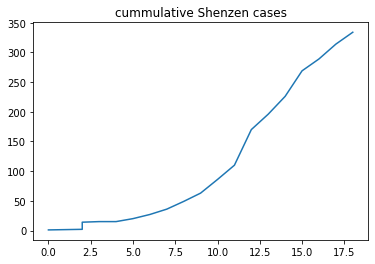

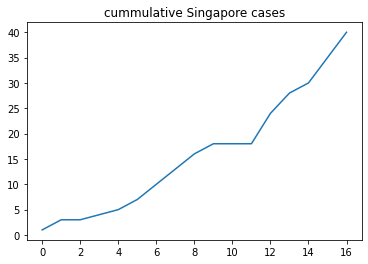

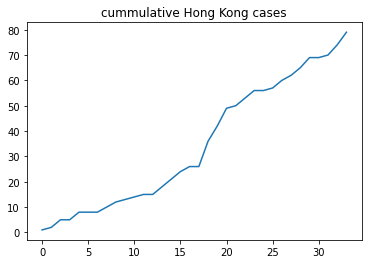

In [2]:
#input data:
#%%
#dates are 1=january1st 22= jan21, etc etc

def plot_data(real_cases,region_label):
  plt.figure()
  plt.plot(real_cases[:,0]-t0,real_cases[:,1])
  plt.title('cummulative ' + region_label + ' cases')


simulation_region="Shenzen"
brute_cases_shenzhen=[1,2,14,15,15,20,27,36,49,63,86,110,170,196,226,269,289,314,334]
dates_shenzhen=[19,21,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
shenzen_cases=np.vstack((np.array(dates_shenzhen).T,np.array(brute_cases_shenzhen).T)).T
t0=19
plot_data(shenzen_cases,simulation_region)


simulation_region="Singapore"
brute_cases_singapore=[1,3,3,4,5,7,10,13,16,18,18,18,24,28,30,40]
dates_singapore=[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39]
singapore_cases=np.vstack((np.array(dates_singapore).T,np.array(brute_cases_singapore).T)).T
t0=23

plot_data(singapore_cases,simulation_region)



simulation_region="Hong Kong"
hk_cases= np.array([[22,1],[23,2],[24,5],[25,5],[26,8],[27,8],[28,8],[29,10],
                    [30,12],[31,13],[32,14],[33,15],[34,15],[35,18],[36,21],
                    [37,24],[38,26],[39,26],[40,36],[41,42],[42,49],[43,50],
                    [44,53],[45,56],[46,56],[47,57],[48,60],[49,62],[50,65],
                    [51,69],[52,69],[53,70],[54,74],[55,79]])
t0=22 #start Jan 22

plot_data(hk_cases,simulation_region)

simulation_choice={"t0":22,"label":"Hong Kong","N":7.5*1000*1000,"real_cases":hk_cases}

In [0]:


#%matplotlib auto
#%%

########Initialization of parameters################
# Total population, N.
N=simulation_choice["N"]
t0=simulation_choice["t0"]
real_cases=simulation_choice["real_cases"].copy()

# Initial values I0 and R0.
L0,I0,A0,D0,R0= 0.,10.,10.,0.,0.
# S0 is the rest
S0 = N-L0-I0-A0-D0-R0
gammaL= 1/3.0 # time in the latent non infectious phase
gammaI,gammaA = 1/2.5, 1/5.0 #time to detection or end of infectious phase
beta = .4
delta=1.0 #how infectious is the low danger phase = beta(A)/beta(I)
p=0.1 #probability to have a high danger form
initial_guess_params=(N,beta,gammaL,delta,p,gammaI,gammaA)

# Initial conditions vector
initial_guess_y0 = S0,L0,I0,A0,D0,R0
#############end initialization#############

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SLIADRE model differential equations.
def deriv(y, t, N,beta,gammaL,delta,p,gammaI,gammaA):
    """ 
    the model takes as input a tuple of initial values and constructs the derivative
    """
    S,L,I,A,D,R = y
    dSdt = -beta*S*(I+delta*A)/N 
    dLdt = -dSdt - gammaL * L
    dIdt = p*gammaL*L - gammaI*I
    dAdt = (1-p)*gammaL*L - gammaA*A
    dDdt = gammaI*I   # detected/ diagnosed 
    dRdt = gammaA*A  # removed
    return dSdt,dLdt,dIdt,dAdt,dDdt,dRdt

def myplot():
    plt.figure(32,figsize=(16,8))

    plt.subplot(2,4,1)
    plt.plot(t,S/N,"b")
    plt.legend(["Susceptible"])
    plt.xlabel('Time (days)')

    plt.subplot(2,4,2)
    plt.plot(t,L,"r")
    plt.legend(["Latent"])
    plt.xlabel('Time (days)')

    plt.subplot(2,4,3)
    plt.plot(t,I,"r")
    plt.legend(["Infected"])
    plt.xlabel('Time (days)')

    plt.subplot(2,4,4)
    plt.plot(t,A,"r")
    plt.legend(["Aternative"])
    plt.xlabel('Time (days)')

    plt.subplot(2,4,5)
    plt.plot(t,R,"g")
    plt.legend(["Removed"])
    plt.xlabel('Time (days)')

    plt.subplot(2,4,6)
    plt.plot(t,D,"r",real_cases[:,0]-t0,real_cases[:,1],"x")
    plt.legend(["Detected",simulation_choice["label"] + " cases"])
    plt.xlabel('Time (days)')

    plt.savefig("figure2.png")
    plt.savefig("figure2.pdf")
    plt.show()

## Test from initial conditions (not fitted)

Parameters are not fitted and there is no epidemic control enforced.

initial_guess_params= (7500000.0, 0.4, 0.3333333333333333, 1.0, 0.1, 0.4, 0.2)


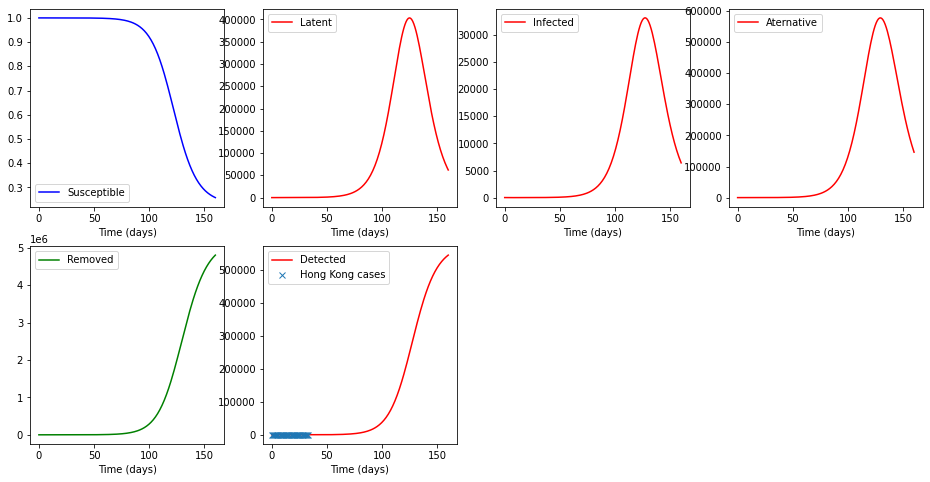

In [24]:
#test from initial conditions
# Integrate the SIR equations over the time grid, t.
print('initial_guess_params=',initial_guess_params)
ret = odeint(deriv, initial_guess_y0, t, args=initial_guess_params)
S,L,I,A,D,R = ret.T
myplot()
